# Wine Quality Prediction

# Work Flow

Pull Data -> Data Analysis -> Data Pre-Processing -> Train Test Split -> ML Model (Random Forest Model) -> Trained Random Forest Model

(New Data -> Trained Random Forest Model -> Prediction)


### Importing needed packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [6]:
#import Data
df = pd.read_csv(r'C:\Users\Bora\Management Of RBR\RBR Builds - Documents\RBR Analytics\ML Test\Wine Quality Data\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape # Count number of rows and columns

(1599, 12)

In [12]:
# We need to check for missing values
df.isnull().sum()
# If there were missing values we would either drop it OR we woud calculate the mean value of the column  and use that. 
# There are also other ways

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Analysis and Visualization

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


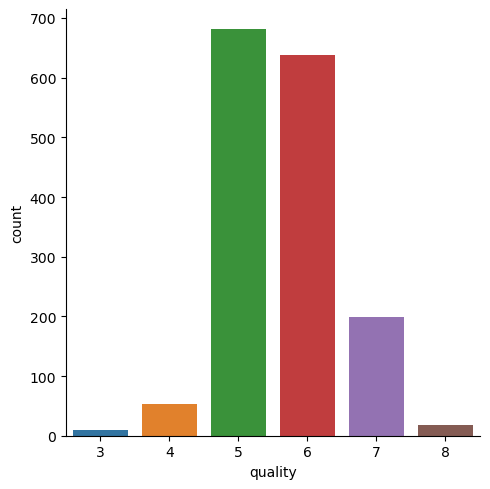

In [14]:
#Let's now see the distribution of of the quality of wine
sns.catplot(x = 'quality', data = df, kind = 'count')

In [15]:
# let's find the average quality
df['quality'].mean()

5.6360225140712945

### The average quality score is 5.6

Let's now look at some correlation - 

let's see which values are related to quality.

As a value goes up how does that relate to the quality? I.E if volatiel acidity goes up does quality?

Text(0, 0.5, 'Volatile Acidity Score')

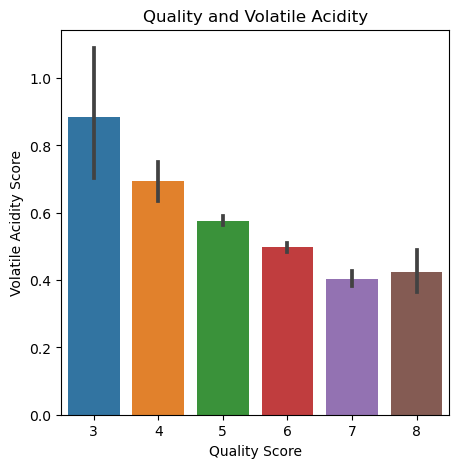

In [23]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

plt.title('Quality and Volatile Acidity')
plt.xlabel('Quality Score')
plt.ylabel('Volatile Acidity Score')


<Axes: xlabel='quality', ylabel='citric acid'>

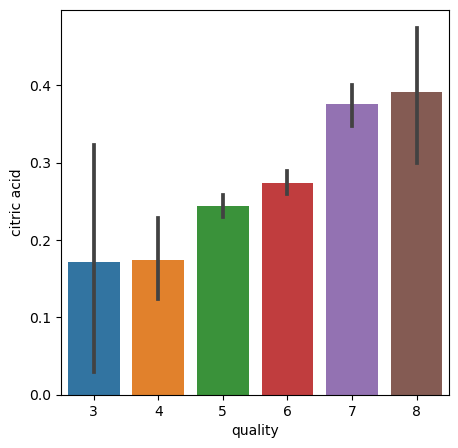

In [24]:
# Citric Acid vs Quality

plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

# Correlation
1. Positive

2. Negative

In [25]:
correlation = df.corr()

<Axes: >

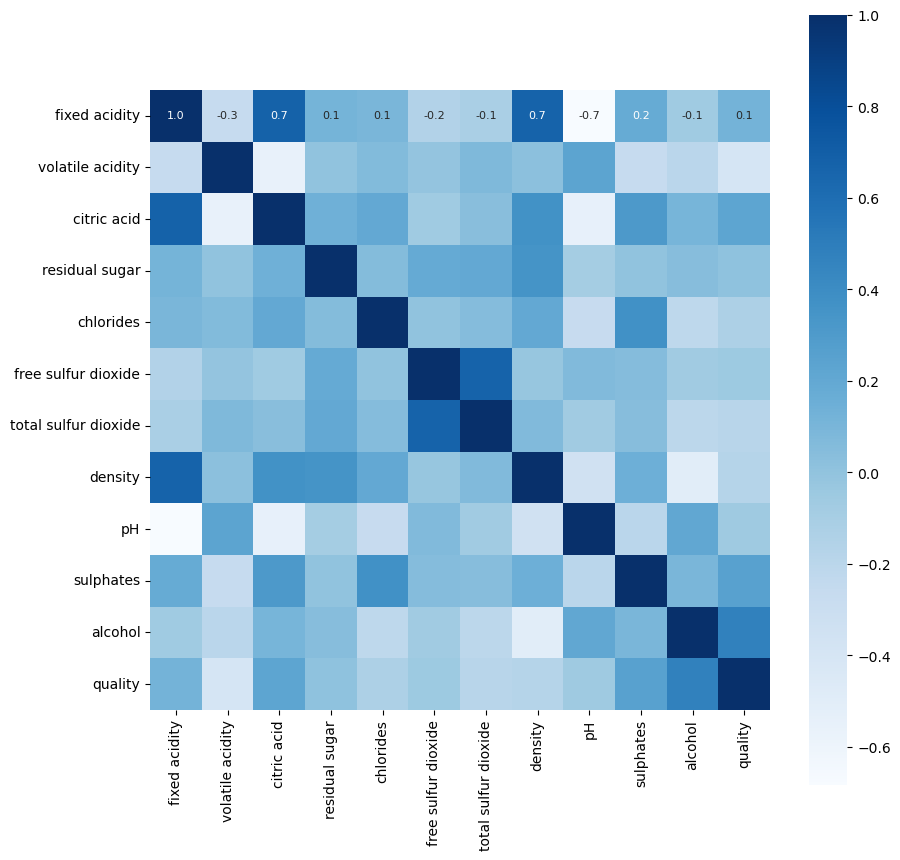

In [28]:
# creating a heatmap to visualize to better udnerstand the correlation between the columns
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar =True, square= True, fmt = '.1f', annot= True, annot_kws= {'size': 8}, cmap = 'Blues')

The darker the color of the square the more positive correlation there is betweem the variables 

For example look at quality on the X axis and quality of the Y axis, the box is dark blue because they're heavily correlated. they're heavily correlated because they're the same variable.

Now look at quality and alcohol, it pretty dark because as acohol goes up, so does the quality

# Data Preprocessing for Machine Learning Model

# Separating the predictor and predicted variables

Predicted variable  = Quality column


In [32]:
X = df.drop('quality', axis = 1)
Y = df['quality']
print(X)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [33]:
# We need to make our predicted variable binary for the model to work better
Y = df['quality'].apply(lambda y_value: 1 if y_value >7 else 0)

If the quality score is higher than 7, then its a 1. 

If it's less than 7 its a O

1 = Good

0 = Not Good

# Train and Test Split Data

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify= Y, random_state= 3)

In [48]:
# lets check the size of the data
Y.shape, Y_train.shape, Y_test.shape

((1599,), (1279,), (320,))

# Model Training

Random Forest Classifier

In [49]:
model = RandomForestClassifier()

In [50]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation
Accuracy Score

In [51]:
# accuracy on training data

x_training_prediction = model.predict(X_train)
training_accuracy_score = accuracy_score(x_training_prediction, Y_train)
print('training Accuracy Score is: ', training_accuracy_score)

training Accuracy Score is:  1.0


Wow the accuracy score is 1! that's a little unbelieveable - Might be because of the good and not good split
 

Lets look at the accuracy for the test data 

In [52]:
x_test_prediction = model.predict(X_test)
test_accuracy_score = accuracy_score(x_test_prediction, Y_test)
print('Accuracy for Test Data is: ', test_accuracy_score )


Accuracy for Test Data is:  0.9875


Still pretty high

# lets now Build a Predictive Model

In [56]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

#Changing the input data toa numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the data as we preidcting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


c:\Users\Bora\Anaconda2024\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Great !! We just Created a predictive model to predict the quality of wine!